Generate test cases for bessel interpolation and masking.

Import all required packages

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [3]:
from utils import clean,to_radian,hann
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd

Load the data saved as a dictionary

In [4]:
# load data
data_dict = pickle.load(open('data_dict.p','rb'))

### Masking
Try putting a smooth mask on an image.

In [5]:
from mask import circle_mask

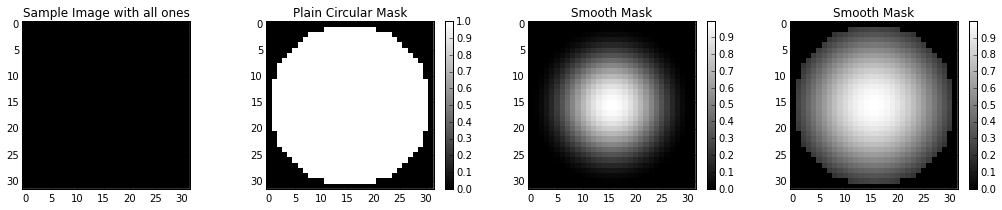

In [11]:
im = np.ones([32,32])
plt.figure(figsize=[18,3])
# a blank image
plt.subplot(1,4,1)
plt.imshow(im,interpolation='None',cmap='gray')
plt.title('Sample Image with all ones')
# putting a circular mask on the image
plt.subplot(1,4,2)
plt.imshow(circle_mask(im,False),interpolation='None',cmap='gray')
plt.title('Plain Circular Mask')
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(circle_mask(im),interpolation='None',cmap='gray')
plt.title('Smooth Mask')
plt.colorbar()
plt.subplot(1,4,4)
plt.imshow(circle_mask(im,True,2),interpolation='None',cmap='gray')
plt.title('Smooth Mask')
plt.colorbar()
plt.show()

## Bessel Interpolation

Test bessel interpolation with a plain image with all ones.

In [14]:
from Bessel_Interp import bessel_rotate

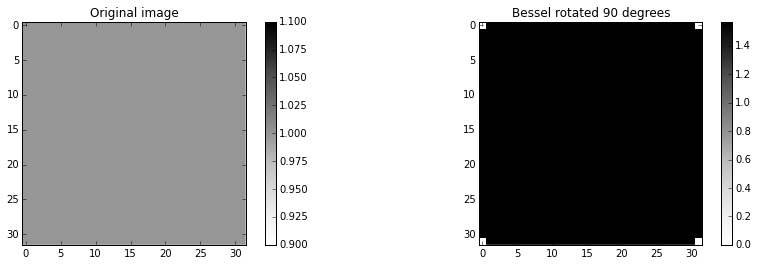

In [43]:
# Visualize Bessel Interpolation
interped = bessel_rotate(im,90,mask=False)
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.imshow(im, interpolation='None',cmap='Greys')
plt.title('Original image')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(interped, interpolation='None',cmap='Greys')
plt.title('Bessel rotated 90 degrees')
plt.colorbar()
plt.show()

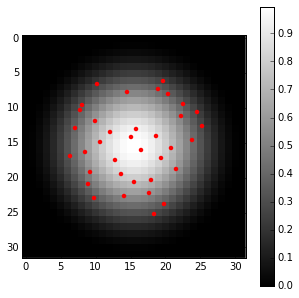

In [42]:
N = 100
r = 32
sequencer = ghalton.GeneralizedHalton(ghalton.EA_PERMS[:3])
sequencer.reset()
points = sequencer.get(N)
pts = np.array(points)
s = (r-1)/2.
x1 = (r-1) * pts[:,0]
y1 = (r-1) * pts[:,1]

mask = np.sqrt((x1-s)**2+(y1-s)**2) < s - 5
plt.figure(figsize=[5,5])
plt.scatter(x1[mask],y1[mask],c='r',lw=0)
plt.imshow(circle_mask(im,True,1),interpolation='None',cmap='gray')
plt.colorbar()
plt.show()